# <center> 19CSE431 - Digital Image Processing </center>
## <center> Lab Evaluation 3 </center>

### Members: 





| S.No      | Name | Roll No     |
| :---:        |    :----:   |          :---: |
| 1.      | M Jietthesh Balaji       | CB.EN.U4CSE20322   |
| 2.   | Raj Mota        | CB.EN.U4CSE20349      |
| 3.      | Sai Sidharth Sriram       | CB.EN.U4CSE20352   |
| 4.   | Sakthi Vikkraman R       | CB.EN.U4CSE20353      |

### Problem Statement:  
Recently, Image Processing Techniques are widely used in several medical areas for image improvement and nowadays is used for early detection and treatment. Medical field is one such field where time factor is at the utmost priority and it is very important to detect the abnormal tissues in target images in the case of Cancer. In recent times, Lung Cancer has become a sign of fear amongst the people all over the world. With the advancement in technology, it is now possible to automate this whole process with the help of Computer Vision. With the help of Image Processing techniques, it is now possible to automate the pre-processing of Medical Images which aids in early detection of Cancer growth. In this particular paper, CT (Computed Tomography) Scan Images of Lungs are processed using various techniques like Filtering, Noise Removal, Morphological Techniques and Segmentation Techniques. Image Quality and Accuracy are the core areas of focus in this paper and our end goal is to generalize the methods use so that the same procedure can be scaled up to work with any given dataset. 

## Evaluation 3 Topics
### Segmentation:    
1) Edge Detection Using Filters, Sobel  
2) The Marr-Hildreth edge detector  
3) Canny Edge Detection  
5) Otsu or Multiple Thresholding      

### Morphological Image Processing
1) Dilation  
2) Erosion  
3) Opening and Closing  
4) The Hit or Miss Transform  
5) Extraction of Connected Components  

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from numpy.fft import fft2, ifft2
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import median
from skimage.morphology import disk
from skimage.filters import gaussian
from skimage.filters import laplace
from skimage.util import random_noise
from skimage.filters import sobel
import math
from math import sqrt, log10, exp
from PIL import Image, ImageFilter
from PIL import ImageChops
from scipy.signal import gaussian
from scipy.ndimage.filters import median_filter
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go

In [3]:
import skimage.morphology as morph
from skimage import filters, morphology
from skimage.color import label2rgb

In [4]:
image_path = r'C:/Users/Saisid/Downloads/College/Semester 5/19CSE431 - Digital Image Processing/Additional Files/Lung Cancer Datasets/Dataset - Kaggle/Image Dataset/'

In [5]:
directory = r'C:/Users/Saisid/Downloads/College/Semester 5/19CSE431 - Digital Image Processing/Additional Files/Lung Cancer Datasets/Dataset - Kaggle/Image Dataset/Extracted/'

In [6]:
def generate_mask(img_base):
    mask = img_base < 175
    img_borderless = clear_border(mask)
    region = label(img_borderless)
    reg = regionprops(region)
    areas = [r.area for r in reg]
    indices = np.argsort(areas)[::-1]
    temp_mask = np.zeros_like(region)
    temp_mask = np.zeros_like(region)
    for i in indices[:3]:
        temp_mask[tuple(reg[i].coords.T)] = i+1
    temp_mask = temp_mask > 0
    return temp_mask

### Morphological Image Processing

In [7]:
img_base = cv2.imread(image_path + 'Cancer/cancer_9.jpg',0)

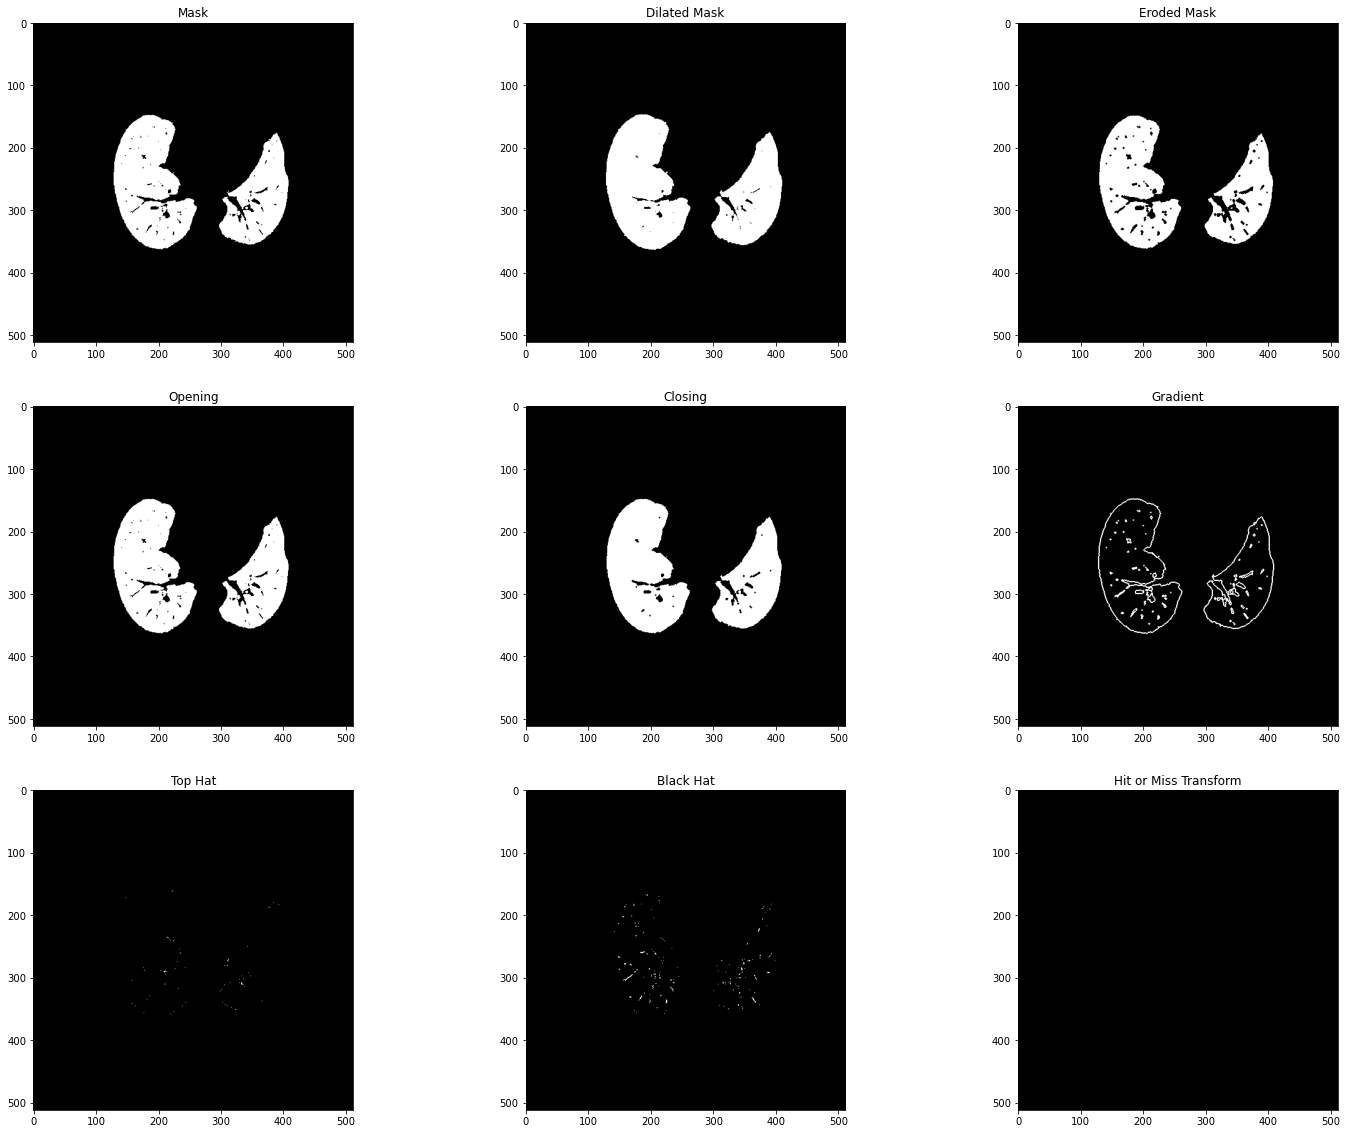

In [8]:
mask = generate_mask(img_base)
#Generating the Kernal 
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# ndi.binary_closing(mask)
dilation = morph.binary_dilation(mask)
erosion = morph.binary_erosion(mask)
opening = morph.binary_opening(mask)
closing = morph.binary_closing(mask)
gradient = dilation ^ erosion
top_hat = morph.white_tophat(mask)
black_hat = morph.black_tophat(mask)
hit_miss = ndi.binary_hit_or_miss(mask)

titles = ['Mask', 'Dilated Mask', 'Eroded Mask', 'Opening', 'Closing', 'Gradient', 'Top Hat', 'Black Hat', 'Hit or Miss Transform']
images = [mask, dilation, erosion, opening, closing, gradient, top_hat, black_hat, hit_miss]
fig=plt.figure(figsize=(25, 20))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+01, 2.8100e+02, 5.4696e+04,
        1.2685e+04, 2.1074e+04, 1.2543e+04, 1.4380e+04, 6.9200e+03,
        7.8930e+03, 5.8900e+03, 2.6780e+03, 2.6320e+03, 1.0740e+03,
        1.0650e+03, 5.3300e+02, 7.8000e+02, 5.6200e+02, 8.9700e+02,
        1.0000e+03, 7.5700e+02, 1.2040e+03, 8.9900e+02, 1.3910e+03,
        1.0560e+03, 1.5500e+03, 1.0600e+03, 1.6370e+03, 1.0760e+03,
        1.6660e+03, 1.6380e+03, 1.0160e+03, 1.5180e+03, 9.1000e+02,
        1.3150e+03, 7.2400e+02, 1.0520e+03, 6.7700e+02, 8.2200e+02,
        7.5100e+02, 4.4100e+02, 6.4000e+02, 3.5900e+02, 5.1100e+02,
        3.0800e+02, 4.5100e+02, 2.7800e+02, 3.7400e+02, 2.4500e+02,
        3.5100e+02, 3.3900e+02, 2.1200e+02, 3.0900e+02, 2.1600e+02,
        3.3300e+02, 2.4200e+02, 4.7800e+02, 3.9700e+02, 7.5800e+02,
        1.2020e+03, 1.2700e+03, 2.4680e+03, 2.22

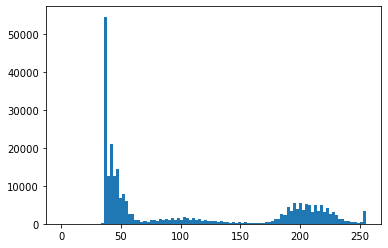

In [9]:
plt.hist(img_base.flat, bins = 100, range=(0,255))

### Otsu Thresholding

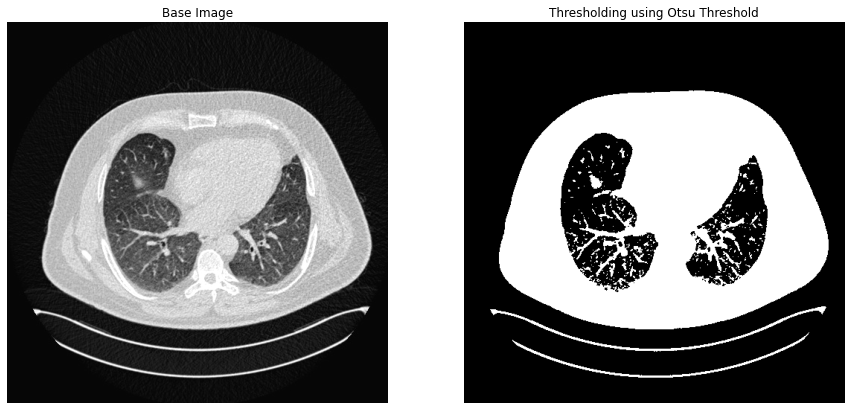

In [10]:
#Ret holds the Threshold Value and th holds the array after thresholding
ret, th = cv2.threshold(img_base, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th_negative = 1 - th
images = [img_base, th]
titles = ['Base Image', 'Thresholding using Otsu Threshold']
fig=plt.figure(figsize=(15, 20))
for i in range(2):
    plt.subplot(1,2, i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])

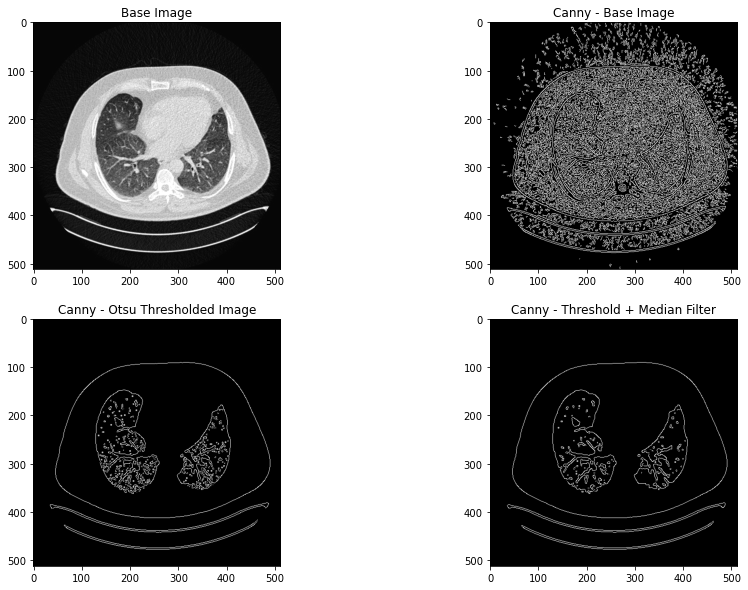

In [13]:
img_filtered = cv2.medianBlur(th,3)
canny_base = canny_edge_detector(img_base)
canny = canny_edge_detector(th)
canny_median = canny_edge_detector(img_filtered)

images = [img_base, canny_base, canny, canny_median]
titles = ['Base Image', 'Canny - Base Image', 'Canny - Otsu Thresholded Image', 'Canny - Threshold + Median Filter']
fig=plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2,2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])

In [12]:
#For Canny Edge Detection
import argparse
import glob

def sobel(img):
    kernal_x = np.array([[-1, -2, -1], [0,0, 0],[1,2,1]])
    kernal_y = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    edges_x = cv2.filter2D(img, -1, kernal_x)
    edges_y = cv2.filter2D(img, -1, kernal_y)
    sobel_out = edges_x + edges_y
    return sobel_out

def robert(img):
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[-1,0],[0,1]])
    edges_x = cv2.filter2D(img, -1, kernel_x)
    edges_y = cv2.filter2D(img, -1, kernel_y)
    robert_out = edges_x + edges_y
    return robert_out

def prewitt(img):
    kernel_y = np.array([[1, 0,-1], [1,0, -1],[1,0,-1]])
    kernel_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    edges_x = cv2.filter2D(img, -1, kernel_x)
    edges_y = cv2.filter2D(img, -1, kernel_y)
    prewitt_out = edges_x + edges_y
    return prewitt_out

def kirsch(img):
    kirsch_masks = [
        np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),
        np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),
        np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),
        np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]]),
        np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),
        np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),
        np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),
        np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]])
    ]
    edges = []
    for mask in kirsch_masks:
        edges.append(cv2.filter2D(img, -1, mask))
    edge_detected_image = np.zeros(img.shape, dtype=np.uint8)
    for edge in edges:
        edge_detected_image = cv2.max(edge_detected_image, edge)
    return edge_detected_image

def marr_hildrith(img):
    #Blur the original Image
    blur = cv2.GaussianBlur(img, (3, 3), 0)
    #Apply Laplacian Filter on the Gaussian Blur
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)
    # Apply a threshold to the Laplacian image to identify the edges
    _, laplace_gaussian = cv2.threshold(laplacian, 5, 255, cv2.THRESH_BINARY)
    return laplace_gaussian

def canny_edge_detector(image, sigma=0.33):
    #Blurring the image slightly using Gaussian Blur
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

def laplacian_normal(img):
    kernel = np.array([[0,1,0], [1,-4,1],[0,1,0]])
    output = cv2.filter2D(img, -1, kernel)
    return output
    
def laplacian_diagonal(img):
    kernel = np.array([[1,1,1], [1,-8,1],[1,1,1]])
    output = cv2.filter2D(img, -1, kernel)
    return output

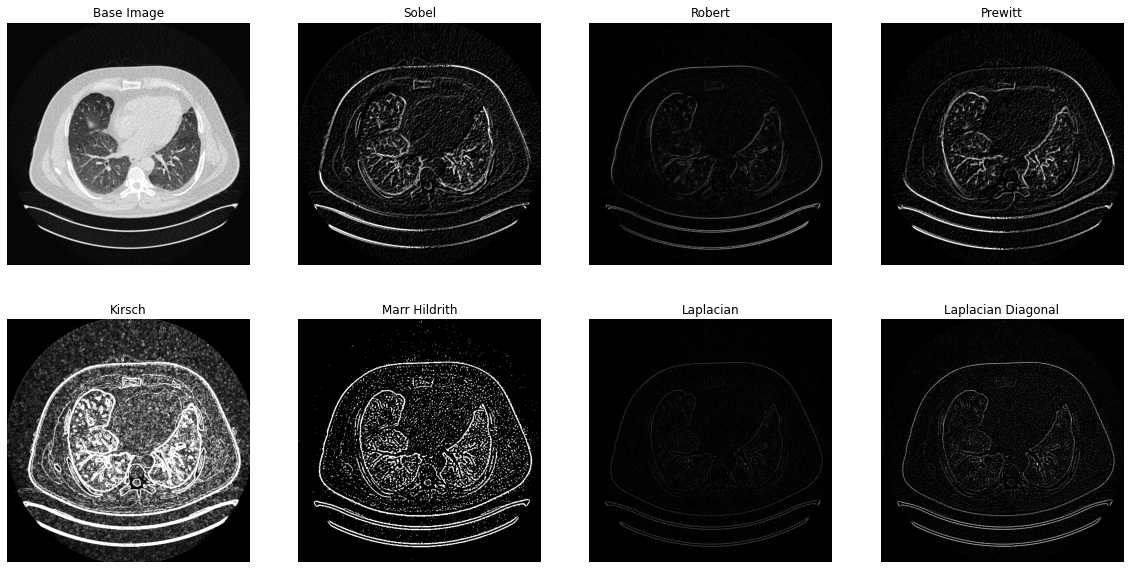

In [14]:
#Applying Median Filter
img = cv2.medianBlur(img_base,3)
sobel_edge = sobel(img)
robert_edge = robert(img)
prewitt_edge = prewitt(img)
kirsch_edge = kirsch(img)
marr_hildrith_edge = marr_hildrith(img)
laplacian_normal_edge = laplacian_normal(img)
laplacian_diagonal_edge = laplacian_diagonal(img)

images = [img_base, sobel_edge, robert_edge, prewitt_edge, kirsch_edge, marr_hildrith_edge, laplacian_normal_edge, laplacian_diagonal_edge]
titles = ['Base Image', 'Sobel', 'Robert', 'Prewitt', 'Kirsch', 'Marr Hildrith', 'Laplacian', 'Laplacian Diagonal']
fig=plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(2,4, i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])

### Connected Components 

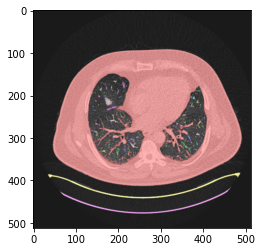

In [15]:
threshold = filters.threshold_otsu(img_base)    #converting it to grayscale and applying a threshold to segment the objects in the image
binary = img_base > threshold
labeled_image = morphology.label(binary)
# label2rgb function to visualize the connected components in the image:
colored_image = label2rgb(labeled_image, image=img_base)
plt.imshow(colored_image)

### Segmentation and Morphological Processing

In [16]:
img_base = cv2.imread(image_path + 'Cancer/cancer_9.jpg',0)

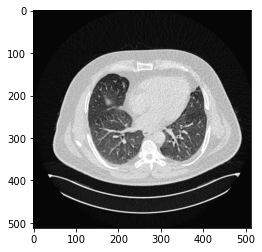

In [17]:
plt.imshow(img_base, 'gray')

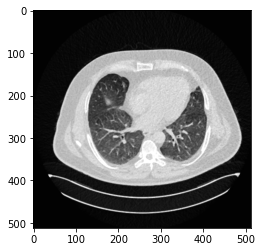

In [18]:
img_base = cv2.medianBlur(img_base, 3)
plt.imshow(img_base, 'gray')

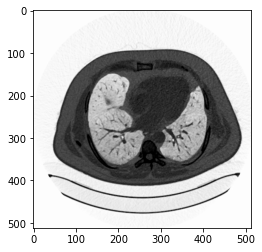

In [19]:
img_negative = 1 - img_base
plt.imshow(img_negative,'gray')

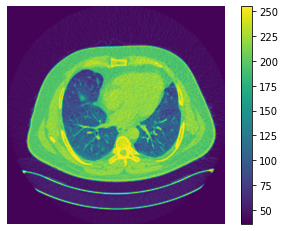

In [20]:
plt.imshow(img_base)
plt.axis("off")
plt.colorbar()

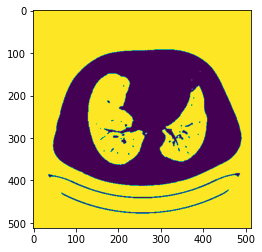

In [21]:
mask = img_base < 175
plt.imshow(mask)

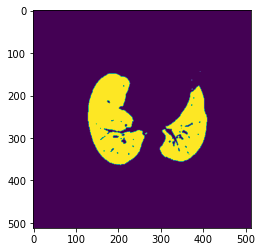

In [22]:
img_borderless = clear_border(mask)
plt.imshow(img_borderless)

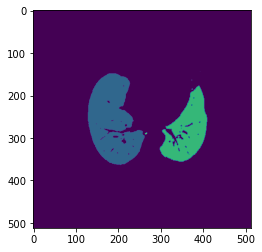

In [23]:
region = label(img_borderless)
plt.imshow(region)

In [24]:
reg = regionprops(region)
areas = [r.area for r in reg]
areas

[1, 18076, 2, 10632, 3, 12]

In [25]:
indices = np.argsort(areas)[::-1]
indices

array([1, 3, 5, 4, 2, 0], dtype=int64)

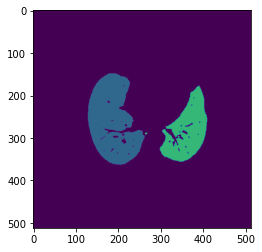

In [26]:
temp_mask = np.zeros_like(region)
for i in indices[:3]:
    temp_mask[tuple(reg[i].coords.T)] = i+1
plt.imshow(temp_mask)

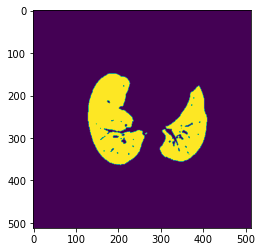

In [27]:
temp_mask = temp_mask > 0
plt.imshow(temp_mask)

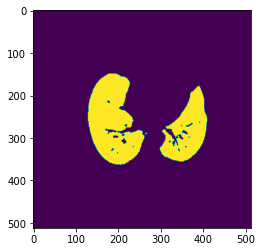

In [28]:
closing = ndi.binary_closing(temp_mask)
plt.imshow(closing)

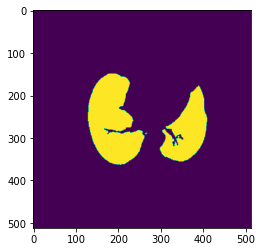

In [29]:
filled = ndi.binary_fill_holes(temp_mask)
plt.imshow(filled)

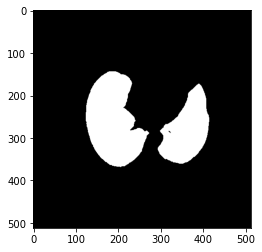

In [30]:
dilation = binary_dilation(filled, iterations=5)
plt.imshow(dilation, 'gray')

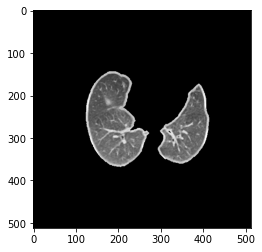

In [31]:
new_img = img_base * dilation
plt.imshow(new_img, cmap='gray')

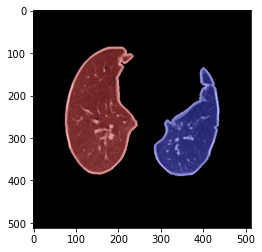

In [36]:
threshold = filters.threshold_otsu(new_img)
binary = new_img > threshold
labeled_image = morphology.label(binary)
colored_image = label2rgb(labeled_image, image=new_img)
plt.imshow(colored_image)

### Enhancing the output

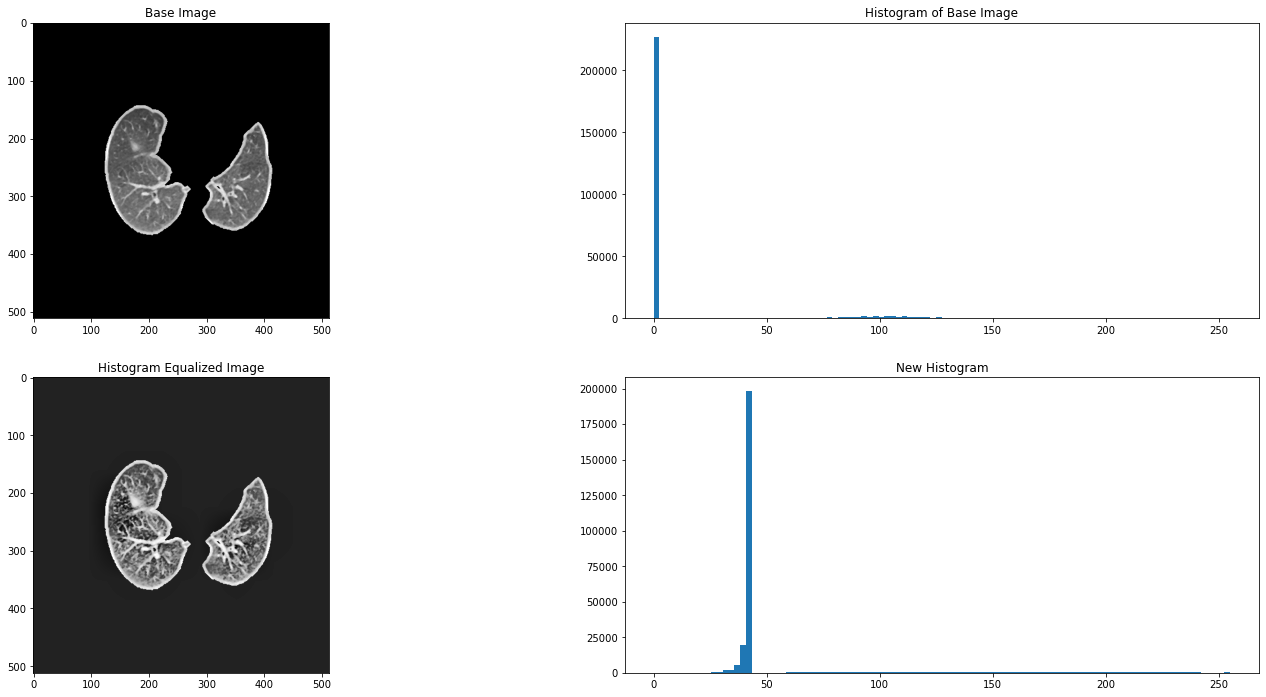

In [33]:
clahe = cv2.createCLAHE()
img_hist_equalized = cv2.equalizeHist(img_base)
img_hist_eq = clahe.apply(new_img)

fig = plt.figure(figsize=(25, 25))

axis1 = fig.add_subplot(4,2,1)
axis1.imshow(new_img, cmap='gray')
axis1.title.set_text('Base Image')

axis2 = fig.add_subplot(4,2,2)
axis2.hist(new_img.flat, bins=100, range = (0,255))
axis2.title.set_text('Histogram of Base Image')

axis3 = fig.add_subplot(4,2,3)
axis3.imshow(img_hist_eq, 'gray')
axis3.title.set_text('Histogram Equalized Image')

axis4 = fig.add_subplot(4,2,4)
axis4.hist(img_hist_eq.flat, bins=100, range = (0,255))
axis4.title.set_text('New Histogram')

### Automating this process

In [34]:
def generate_mask(img_base):
    mask = img_base < 175
    img_borderless = clear_border(mask)
    region = label(img_borderless)
    reg = regionprops(region)
    areas = [r.area for r in reg]
    indices = np.argsort(areas)[::-1]
    temp_mask = np.zeros_like(region)
    temp_mask = np.zeros_like(region)
    for i in indices[:3]:
        temp_mask[tuple(reg[i].coords.T)] = i+1
    temp_mask = temp_mask > 0
    return temp_mask

In [35]:
for i in range(0,20):
    location = image_path + 'Cancer/cancer_' + str(i) + '.jpg'
    img_base = cv2.imread(location,0)
    temp_mask = generate_mask(img_base)
    filled = ndi.binary_fill_holes(temp_mask)
    dilation = binary_dilation(filled, iterations=5)
    new_img = img_base * dilation
    os.chdir(directory)
    filename = 'cancer_' + str(i) + '.jpg'
    print(filename)
    cv2.imwrite(filename, new_img)

cancer_0.jpg
cancer_1.jpg
cancer_2.jpg
cancer_3.jpg
cancer_4.jpg
cancer_5.jpg
cancer_6.jpg
cancer_7.jpg
cancer_8.jpg
cancer_9.jpg
cancer_10.jpg
cancer_11.jpg
cancer_12.jpg
cancer_13.jpg
cancer_14.jpg
cancer_15.jpg
cancer_16.jpg
cancer_17.jpg
cancer_18.jpg
cancer_19.jpg
